In [2]:
import pandas as pd
import requests
from io import StringIO

# Function to convert a Google Drive URL to a direct download link
def get_direct_download_url(drive_url):
    file_id = drive_url.split('/')[5]
    direct_url = f"https://drive.google.com/uc?export=download&id={file_id}"
    return direct_url

# List of file paths for the Excel sheets
file_paths = [
    'https://drive.google.com/file/d/1fPzZA13fvkvs5RggxYjOa2K-1YxSK2oC/view?usp=drive_link',
    'https://drive.google.com/file/d/1R4r3u1rLJrXPnOEfumdqyC0G2r-AMI3E/view?usp=drive_link',
    'https://drive.google.com/file/d/1RNpTDeUHNITM1YmsAEQy8eyIQ6c-1DnR/view?usp=drive_link',
    'https://drive.google.com/file/d/1sjvJk2p3dgYctBG1NdycWh1DQRz5SrDL/view?usp=drive_link',
    'https://drive.google.com/file/d/12-cSFFq_t-YXd7iFaK46wUaC5FlSs0L2/view?usp=drive_link',
    'https://drive.google.com/file/d/1DikZ-u5E8OrFU5oxe4cRyjWj8qVe-WUf/view?usp=drive_link',
    'https://drive.google.com/file/d/1UQOZJywK9sx6C3dwqcYCFPQqVeUuPERD/view?usp=drive_link',
    'https://drive.google.com/file/d/1-xPXQ-8CAQb1sBLNCnfMS9_XopRy0jiu/view?usp=drive_link',
    'https://drive.google.com/file/d/1JVS2jRlaQq3ve8bJlucgcp8S_R1KVnkC/view?usp=drive_link'
]

# List to store DataFrames
dfs = []

# Downloading each file and appending the DataFrame to the list
for file in file_paths:
    download_url = get_direct_download_url(file)
    response = requests.get(download_url)
    if response.status_code == 200:
        # Load the CSV content into a DataFrame
        df = pd.read_csv(StringIO(response.text))
        dfs.append(df)
    else:
        print(f"Failed to download file: {file}")

# Merging all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Step 1: Handling missing values
# Option 1: Dropping rows with missing values
merged_df.dropna(inplace=True)

# Step 2: Removing duplicates
merged_df.drop_duplicates(inplace=True)

# Step 3: Checking data types
# Assuming relevant columns that should be numeric
numeric_cols = ['happiness_score', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']

# Converting these columns to numeric, ignoring errors (coerce)
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 4: Handling invalid values
merged_df = merged_df[(merged_df[numeric_cols] >= 0).all(axis=1)]

# Step 5: Saving the cleaned DataFrame to a new CSV file
merged_df.to_csv('Cleaned_Merged_WHR.csv', index=False)

# Output statistics for validation
print(merged_df.describe())

merged_df.head(28)



              year  happiness_score  gdp_per_capita  social_support  \
count  1365.000000      1365.000000     1365.000000     1365.000000   
mean   2018.901099         5.440500        1.018542        1.045338   
std       2.560363         1.118053        0.453085        0.331248   
min    2015.000000         1.859000        0.000000        0.000000   
25%    2017.000000         4.596000        0.696000        0.832044   
50%    2019.000000         5.440000        1.041000        1.083000   
75%    2021.000000         6.255000        1.338000        1.299370   
max    2023.000000         7.842000        2.209000        1.644000   

       healthy_life_expectancy  freedom_to_make_life_choices   generosity  \
count              1365.000000                   1365.000000  1365.000000   
mean                  0.583980                      0.450919     0.196364   
std                   0.245196                      0.156780     0.113328   
min                   0.000000                      

year               country                        region  happiness_score  \
0   2015           Switzerland                Western Europe            7.587   
1   2015               Iceland                Western Europe            7.561   
2   2015               Denmark                Western Europe            7.527   
3   2015                Norway                Western Europe            7.522   
4   2015                Canada         North America and ANZ            7.427   
5   2015               Finland                Western Europe            7.406   
6   2015           Netherlands                Western Europe            7.378   
7   2015                Sweden                Western Europe            7.364   
8   2015           New Zealand         North America and ANZ            7.286   
9   2015             Australia         North America and ANZ            7.284   
10  2015                Israel  Middle East and North Africa            7.278   
11  2015            Costa Rica   Latin America and Caribbean            7.226   
12  2015               Austria                Western Europe            7.200   
13  2015                Mexico   Latin America and Caribbean            7.187   
14  2015         United States         North America and ANZ            7.119   
15  2015                Brazil   Latin America and Caribbean            6.983   
16  2015            Luxembourg                Western Europe            6.946   
17  2015               Ireland                Western Europe            6.940   
18  2015               Belgium                Western Europe            6.937   
19  2015  United Arab Emirates  Middle East and North Africa            6.901   
20  2015        United Kingdom                Western Europe            6.867   
21  2015                  Oman  Middle East and North Africa            6.853   
22  2015             Venezuela   Latin America and Caribbean            6.810   
23  2015             Singapore                Southeast Asia            6.798   
24  2015                Panama   Latin America and Caribbean            6.786   
25  2015               Germany                Western Europe            6.750   
26  2015                 Chile   Latin America and Caribbean            6.670   
27  2015                 Qatar  Middle East and North Africa            6.611   

    gdp_per_capita  social_support  healthy_life_expectancy  \
0          1.39651         1.34951                  0.94143   
1          1.30232         1.40223                  0.94784   
2          1.32548         1.36058                  0.87464   
3          1.45900         1.33095                  0.88521   
4          1.32629         1.32261                  0.90563   
5          1.29025         1.31826                  0.88911   
6          1.32944         1.28017                  0.89284   
7          1.33171         1.28907                  0.91087   
8          1.25018         1.31967                  0.90837   
9          1.33358         1.30923                  0.93156   
10         1.22857         1.22393                  0.91387   
11         0.95578         1.23788                  0.86027   
12         1.33723         1.29704                  0.89042   
13         1.02054         0.91451                  0.81444   
14         1.39451         1.24711                  0.86179   
15         0.98124         1.23287                  0.69702   
16         1.56391         1.21963                  0.91894   
17         1.33596         1.36948                  0.89533   
18         1.30782         1.28566                  0.89667   
19         1.42727         1.12575                  0.80925   
20         1.26637         1.28548                  0.90943   
21         1.36011         1.08182                  0.76276   
22         1.04424         1.25596                  0.72052   
23         1.52186         1.02000                  1.02525   
24         1.06353         1.19850                  0.79661   
25         1.327

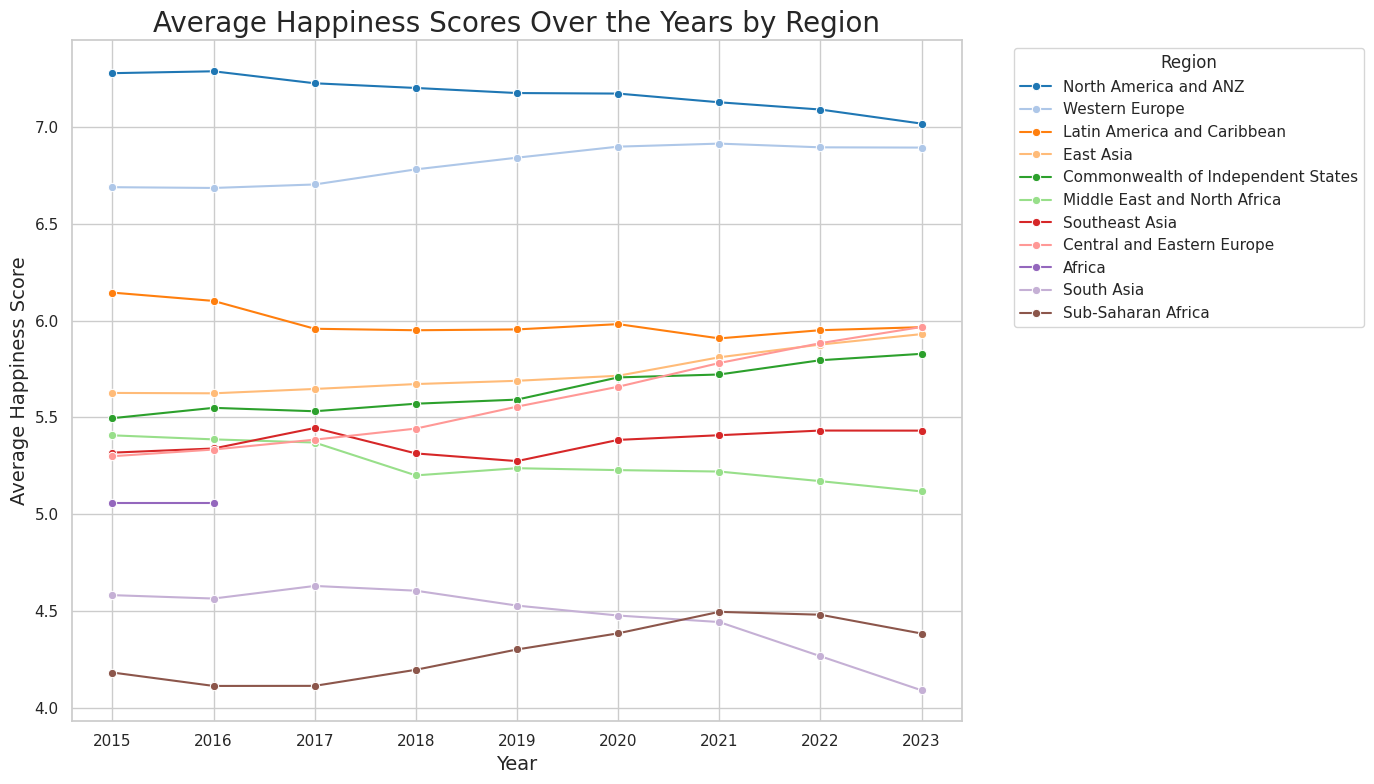

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the merged_df dataset ready with 'region' and 'happiness_score' columns
sns.set(style="whitegrid")

# Group by year and region to get the mean happiness score
region_data = merged_df.groupby(['year', 'region'])['happiness_score'].mean().reset_index()

# Define the custom order for the legend
custom_region_order = [
    'North America and ANZ',
    'Western Europe',
    'Latin America and Caribbean',
    'East Asia',
    'Commonwealth of Independent States',
    'Middle East and North Africa',
    'Southeast Asia',
    'Central and Eastern Europe',
    'Africa',
    'South Asia',
    'Sub-Saharan Africa'
]

# Define a color palette with more distinguishable colors (tab20 provides 20 distinct colors)
color_palette = sns.color_palette("tab20", n_colors=len(custom_region_order))

plt.figure(figsize=(14, 8))
sns.lineplot(data=region_data, x='year', y='happiness_score', hue='region', marker='o',
             palette=color_palette, hue_order=custom_region_order)

plt.title('Average Happiness Scores Over the Years by Region', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Happiness Score', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-4-6fe5f30b99ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='healthy_life_expectancy', data=merged_df, palette="Set2")


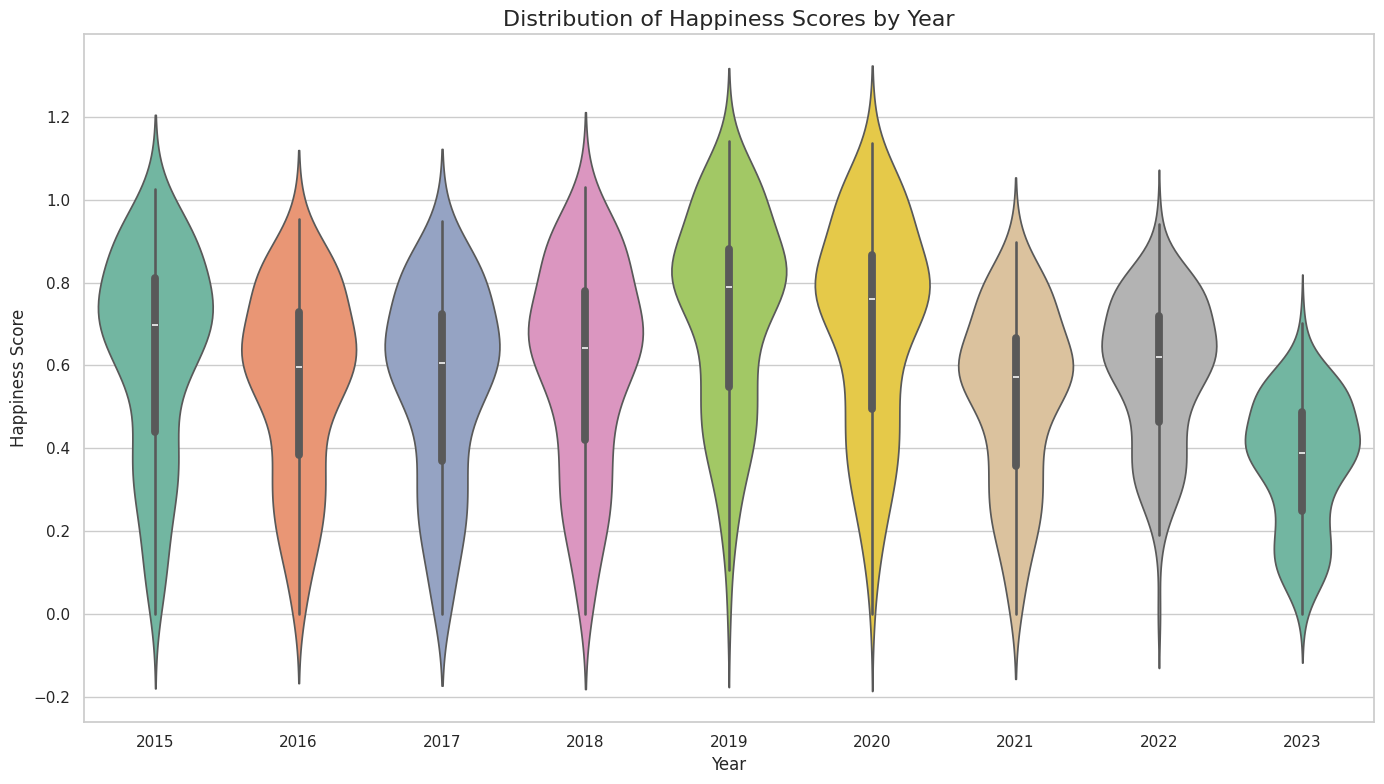

In [4]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='year', y='healthy_life_expectancy', data=merged_df, palette="Set2")
plt.title('Distribution of Happiness Scores by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.tight_layout()
plt.show()


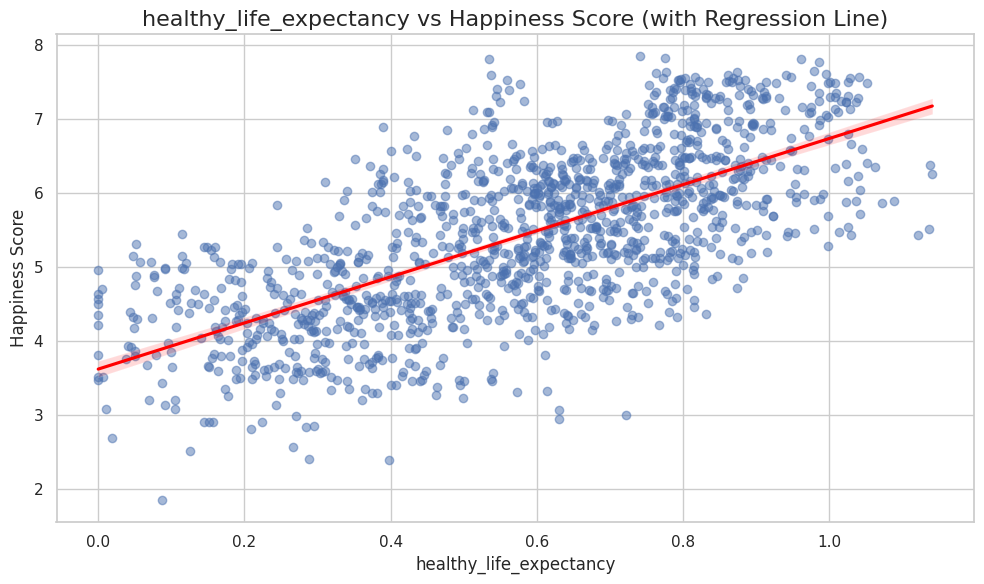

In [5]:
plt.figure(figsize=(10, 6))
sns.regplot(x='healthy_life_expectancy', y='happiness_score', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('healthy_life_expectancy vs Happiness Score (with Regression Line)', fontsize=16)
plt.xlabel('healthy_life_expectancy', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.tight_layout()
plt.show()


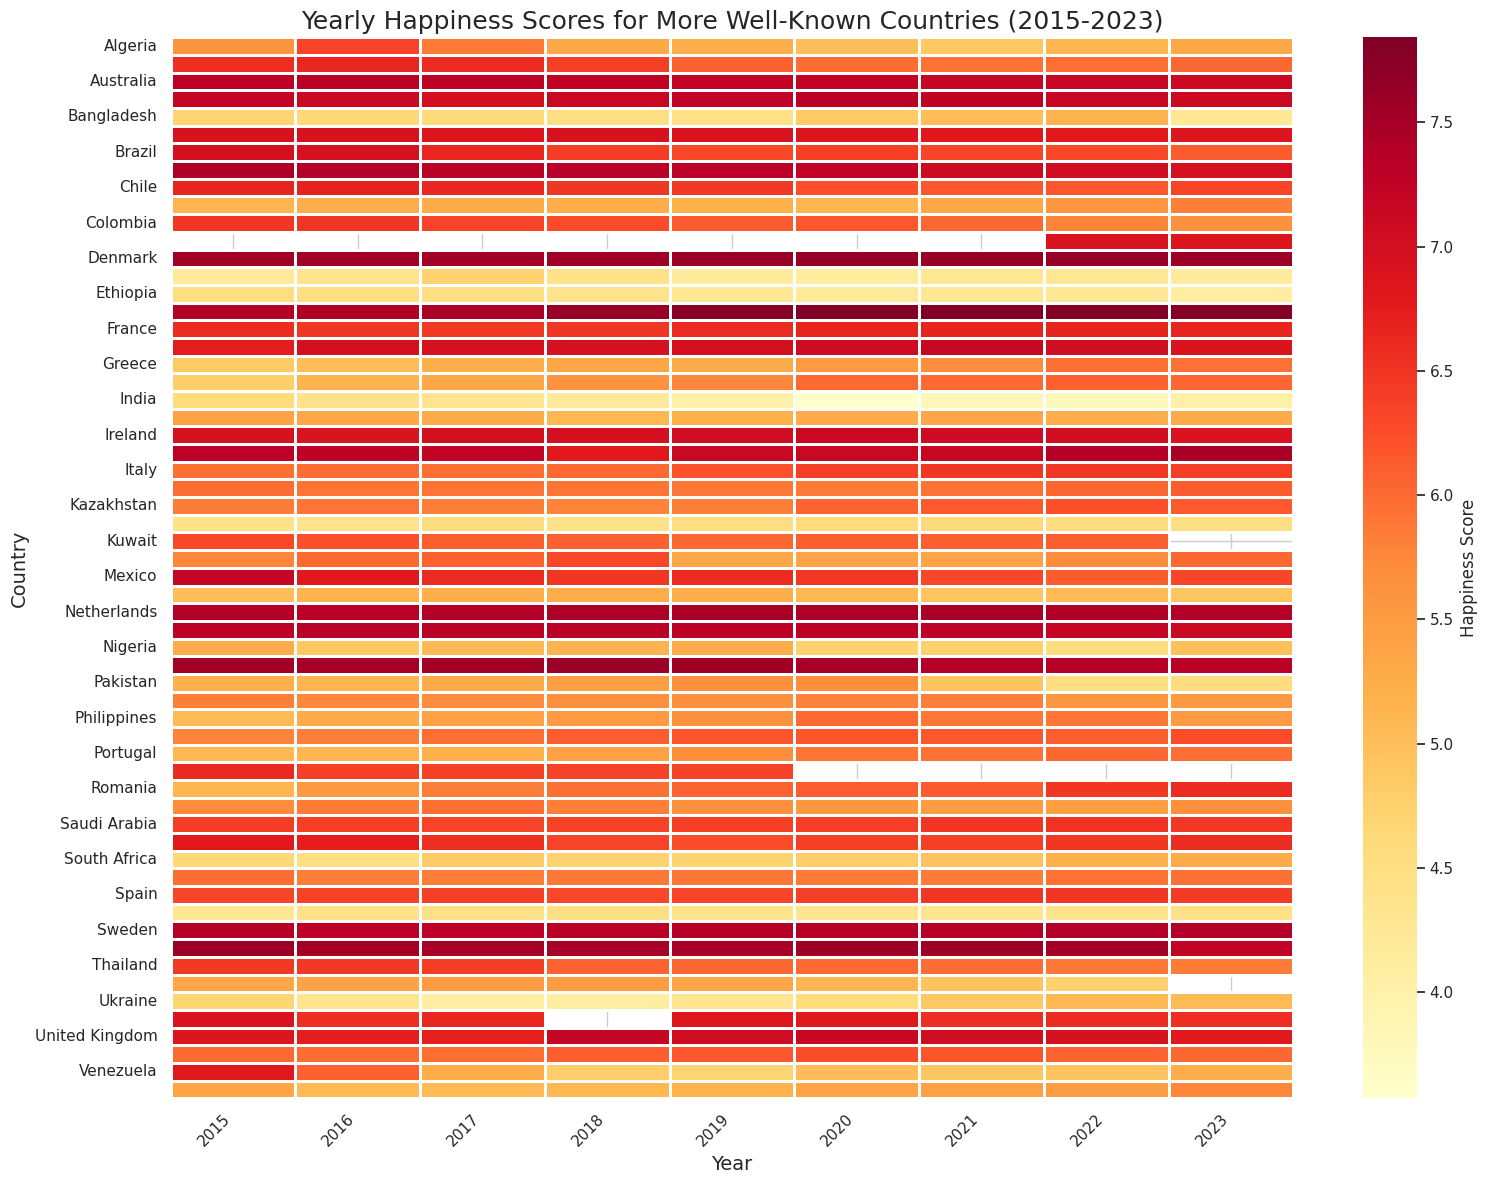

In [6]:
# Expanded list with even more well-known countries globally
more_known_countries = countries = [
    'United States of America', 'India', 'China', 'Brazil', 'Germany',
    'Japan', 'France', 'United Kingdom', 'Canada', 'Australia',
    'South Korea', 'Russia', 'South Africa', 'Mexico', 'Italy',
    'Spain', 'Sweden', 'Switzerland', 'Netherlands', 'Saudi Arabia',
    'Argentina', 'Egypt', 'Turkey', 'Indonesia', 'Norway', 'Malaysia',
    'Pakistan', 'Bangladesh', 'Vietnam', 'Philippines', 'Thailand',
    'Nigeria', 'Kenya', 'Colombia', 'Peru', 'Chile',
    'New Zealand', 'Greece', 'Portugal', 'Belgium', 'Poland',
    'Czechia', 'Denmark', 'Austria', 'Singapore', 'Finland',
    'Ireland', 'Hungary', 'Israel', 'United Arab Emirates', 'Qatar',
    'Kuwait', 'Venezuela', 'Ethiopia', 'Morocco', 'Algeria',
    'Ukraine', 'Romania', 'Sri Lanka', 'Kazakhstan', 'Uzbekistan'
]


# Filter the dataset to include only these countries
more_known_countries_data = merged_df[merged_df['country'].isin(more_known_countries)]

# Create a pivot table for the filtered countries
country_region_data_more = more_known_countries_data.pivot_table(index='country', columns='year', values='happiness_score')

# Plot the heatmap for these countries
plt.figure(figsize=(16, 12))
sns.heatmap(country_region_data_more, cmap='YlOrRd', annot=False, linewidths=0.8, cbar_kws={'label': 'Happiness Score'})

# Improve readability with clear labels
plt.title('Yearly Happiness Scores for More Well-Known Countries (2015-2023)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Rotate labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


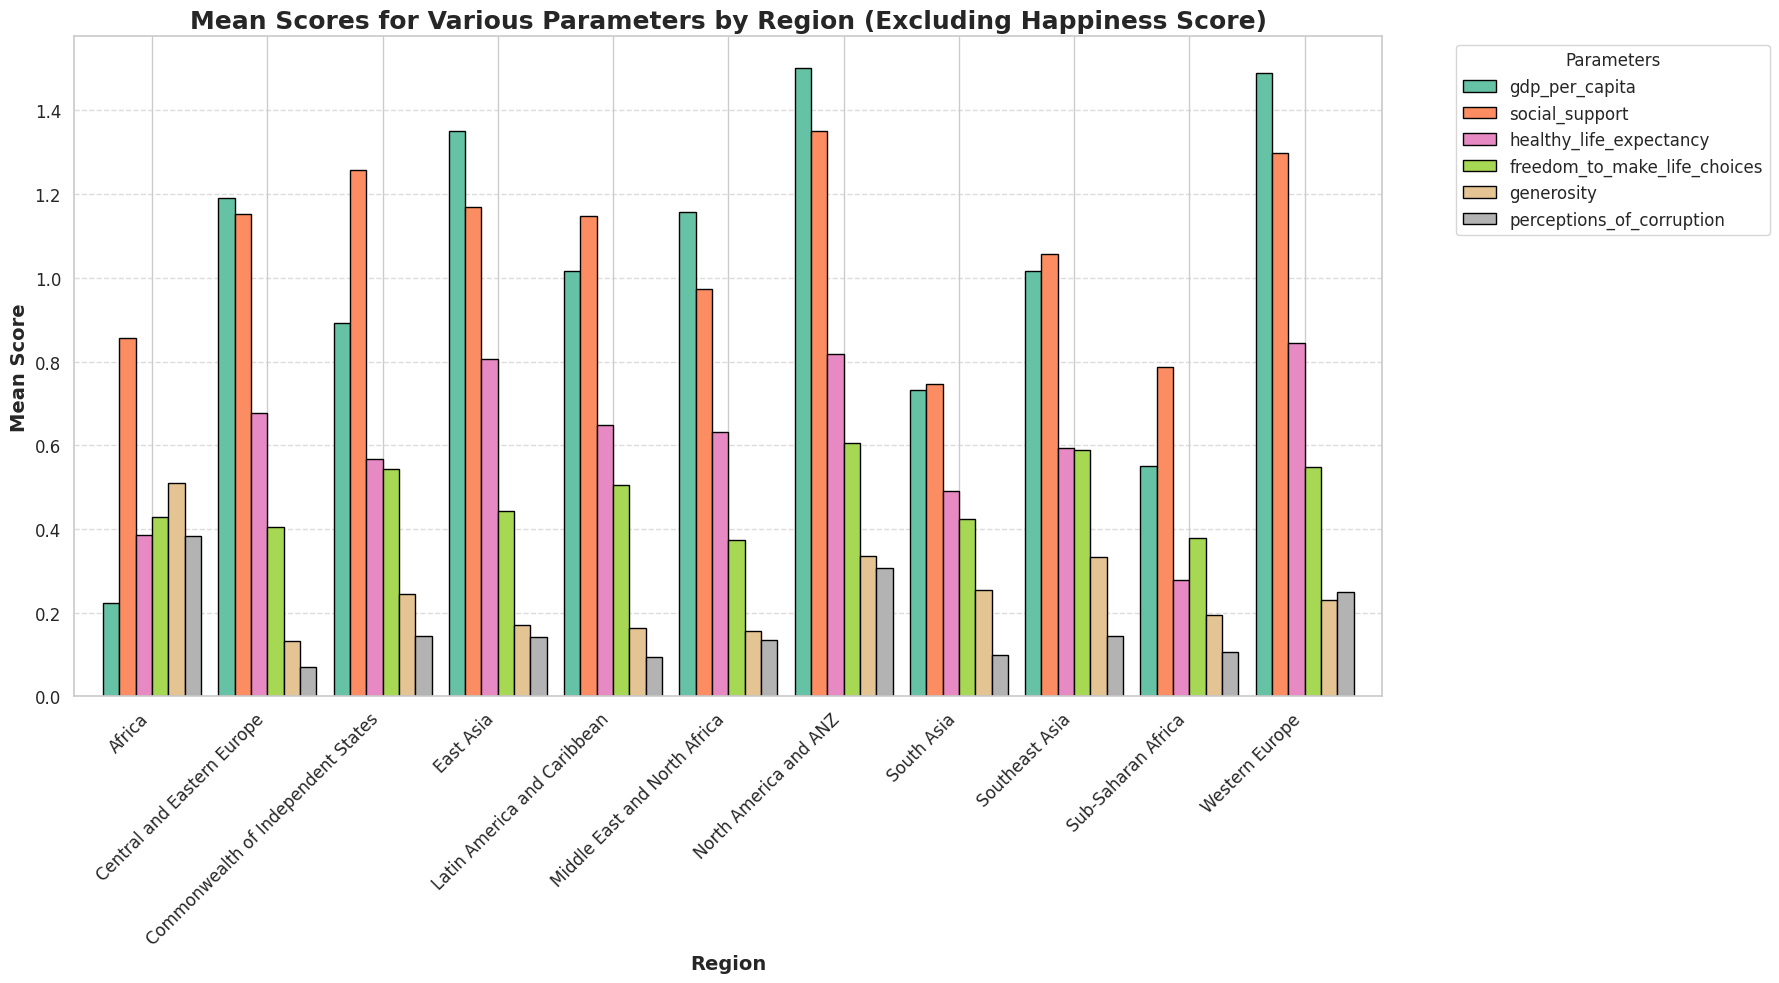

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the list of parameters you want to plot (excluding happiness_score)
parameters = [
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'generosity',
    'perceptions_of_corruption'
]

# Step 2: Calculate the mean values for each region and parameter
region_means = merged_df.groupby('region')[parameters].mean()

# Step 3: Set up the plot with a more balanced size
fig, ax = plt.subplots(figsize=(18, 10))

# Step 4: Plotting the grouped bar charts for each region with all parameters
# Using a distinct color palette (Set2 for distinguishable colors)
region_means.plot(kind='bar', ax=ax, width=0.85, colormap='Set2', edgecolor='black')

# Title and labels
plt.title('Mean Scores for Various Parameters by Region (Excluding Happiness Score)', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Mean Score', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Improve legend readability and placement
ax.legend(title='Parameters', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()


Mounted at /content/drive


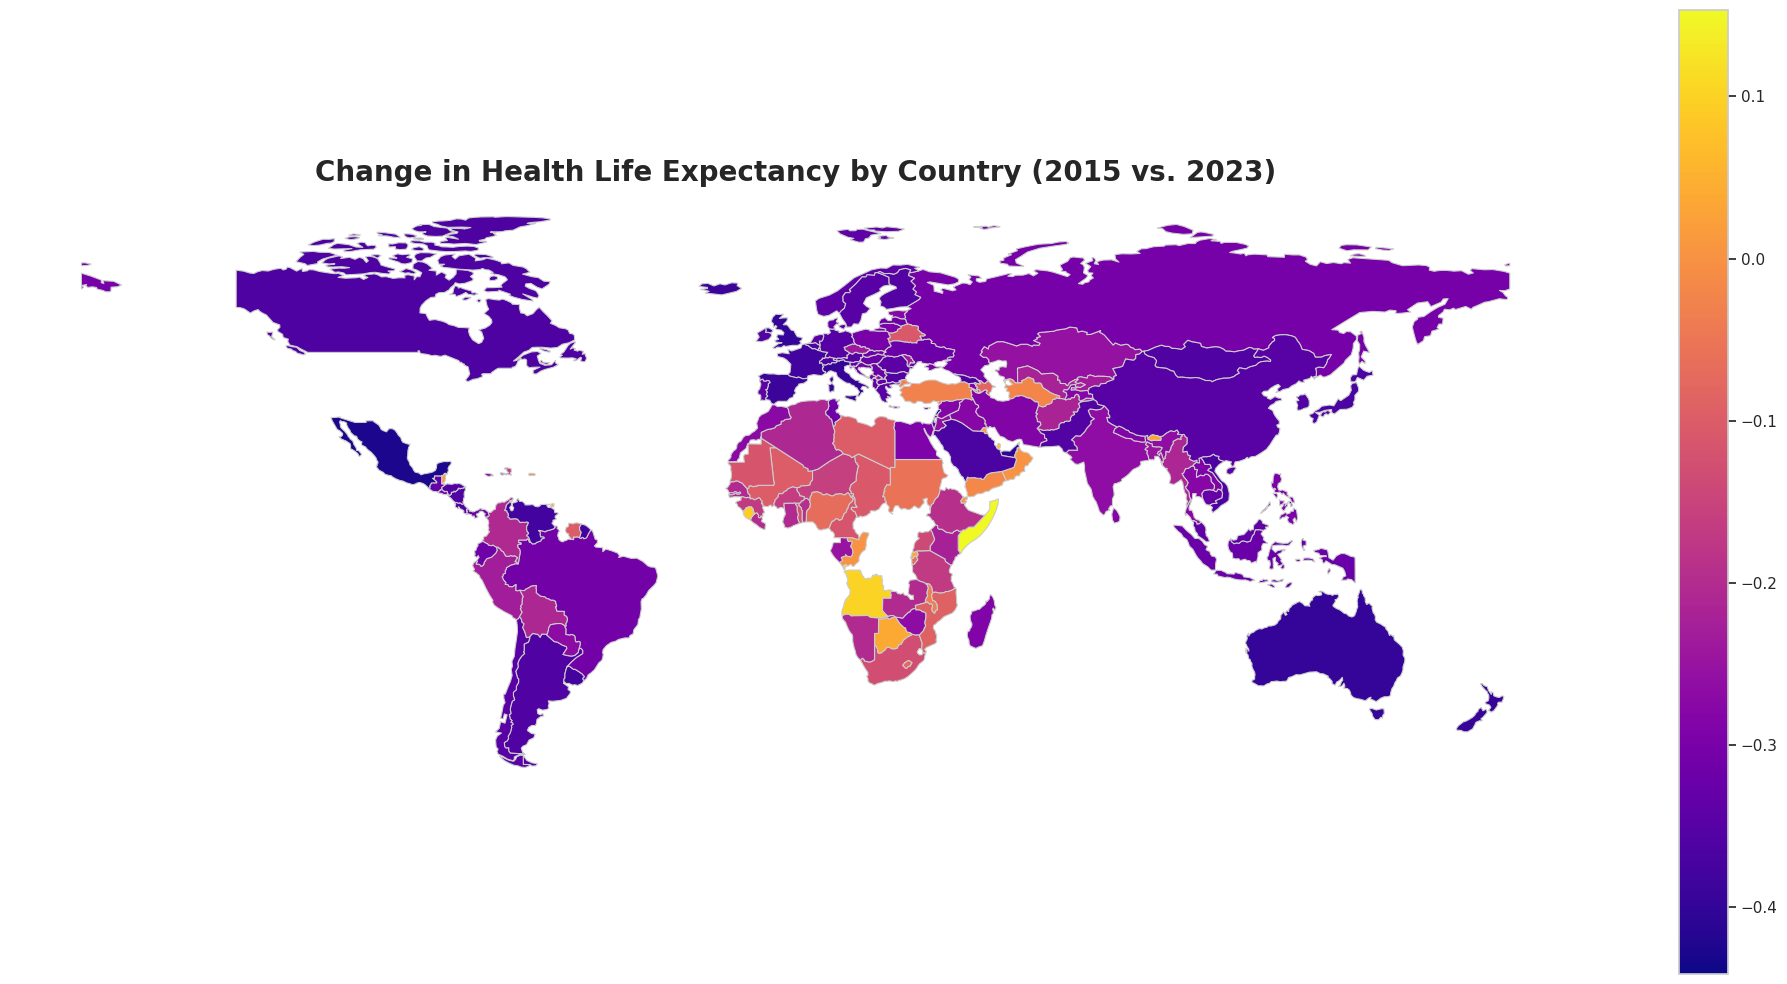

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

### Step 1: Load the world shapefile data (Natural Earth countries shapefile)
shapefile_path = '/content/drive/MyDrive/IS Mid Term Report/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Step 2: Load your happiness and health life expectancy data
# merged_df = pd.read_csv('merged_happiness_data.csv')  # Uncomment and replace with the correct path

# Calculate change in health life expectancy
first_year_health = merged_df.groupby('country')['year'].min().reset_index()
last_year_health = merged_df.groupby('country')['year'].max().reset_index()

# Extract health life expectancy data for the first and last years
first_health_scores = pd.merge(merged_df, first_year_health, on=['country', 'year'], how='inner')[['country', 'healthy_life_expectancy']]
last_health_scores = pd.merge(merged_df, last_year_health, on=['country', 'year'], how='inner')[['country', 'healthy_life_expectancy']]

# Calculate the health life expectancy change (difference between last and first year)
health_diff = pd.merge(first_health_scores, last_health_scores, on='country', suffixes=('_first', '_last'))
health_diff['health_change'] = health_diff['healthy_life_expectancy_last'] - health_diff['healthy_life_expectancy_first']

# Merge the world map with health life expectancy change data
world = world.rename(columns={'NAME': 'country'})  # Rename for consistency with the happiness data
world_data_health = pd.merge(world, health_diff, on='country', how='left')

# Step 3: Plot the world map showing health life expectancy change
fig, ax = plt.subplots(1, 1, figsize=(20, 10))  # Adjusted figsize for better visibility

# Plot countries with health life expectancy change using a more distinguishable colormap
world_data_health.plot(column='health_change', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize plot appearance
ax.set_title('Change in Health Life Expectancy by Country (2015 vs. 2023)', fontsize=20, fontweight='bold')
ax.set_axis_off()  # Hide axes for a cleaner map

# Show the plot
plt.tight_layout()
plt.show()






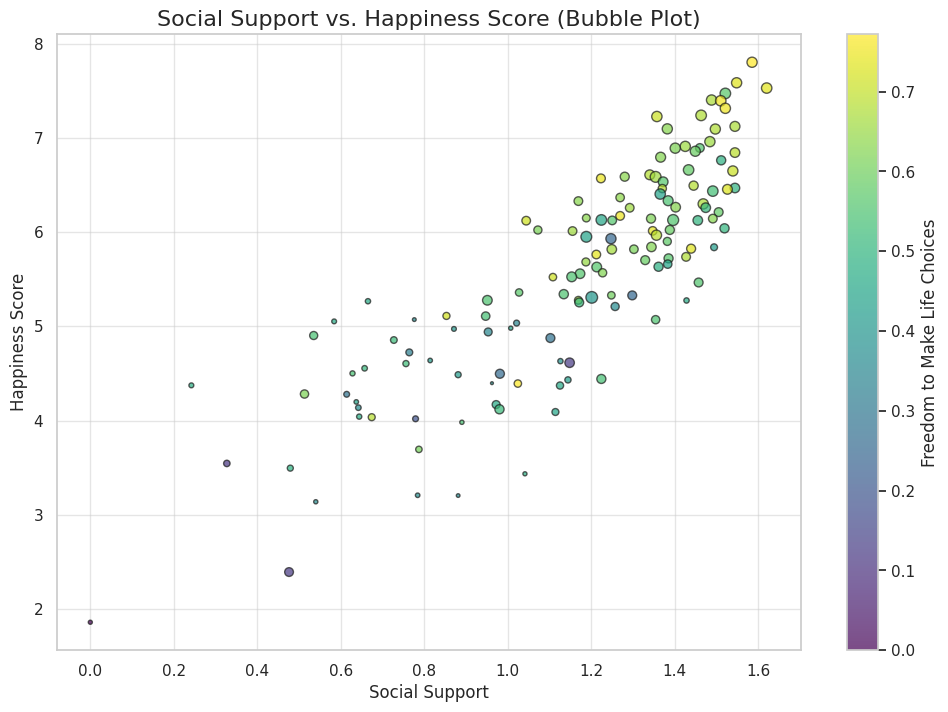

In [9]:
import matplotlib.pyplot as plt

# Bubble plot: Social Support vs. Happiness Score
plt.figure(figsize=(12, 8))
bubble_size = df['healthy_life_expectancy'] * 100  # Scale size for clarity

scatter = plt.scatter(
    df['social_support'],
    df['happiness_score'],
    s=bubble_size,
    alpha=0.7,
    c=df['freedom_to_make_life_choices'],  # Color based on freedom metric
    cmap='viridis',
    edgecolor='k'
)

plt.colorbar(scatter, label='Freedom to Make Life Choices')
plt.title("Social Support vs. Happiness Score (Bubble Plot)", fontsize=16)
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.grid(alpha=0.5)
plt.show()


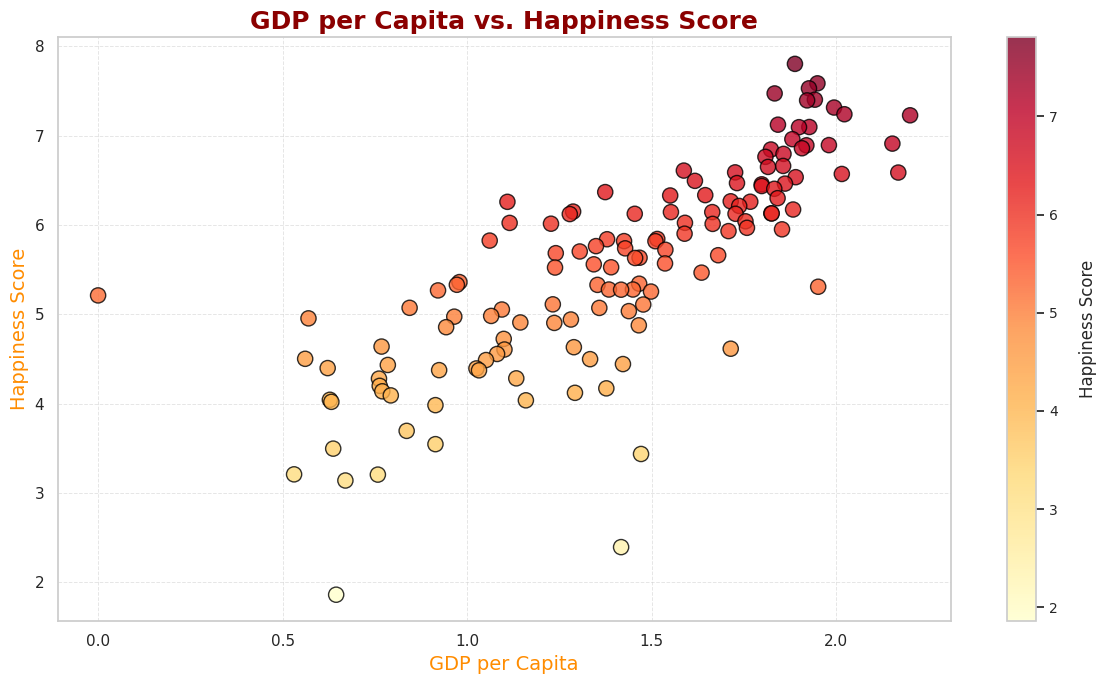

In [10]:
# # Scatter plot: Generosity vs. Perceptions of Corruption
# plt.figure(figsize=(10, 6))

# scatter = plt.scatter(
#     df['gdp_per_capita'],
#     df['happiness_score'],
#     c=df['happiness_score'],  # Color by happiness score
#     cmap='coolwarm',
#     alpha=0.7,
#     s=100,
#     edgecolor='k'
# )

# plt.colorbar(scatter, label='Happiness Score')
# plt.title("gdp_per_capita vs. happiness_score", fontsize=16)
# plt.xlabel("gdp_per_capita")
# plt.ylabel("happiness_score")
# plt.grid(alpha=0.5)
# plt.show()

# Scatter plot: GDP per Capita vs. Happiness Score
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Use a yellow-orange-red colormap
scatter = plt.scatter(
    df['gdp_per_capita'],
    df['happiness_score'],
    c=df['happiness_score'],  # Color by happiness score
    cmap='YlOrRd',  # Yellow-Orange-Red colormap
    alpha=0.8,
    s=120,  # Slightly larger markers
    edgecolor='black'  # Add black borders for sharp contrast
)

# Add a colorbar with a better label
cbar = plt.colorbar(scatter)
cbar.set_label('Happiness Score', fontsize=12, labelpad=15)
cbar.ax.tick_params(labelsize=10)

# Add a title and labels with increased font size
plt.title("GDP per Capita vs. Happiness Score", fontsize=18, fontweight='bold', color='darkred')
plt.xlabel("GDP per Capita", fontsize=14, color='darkorange')
plt.ylabel("Happiness Score", fontsize=14, color='darkorange')

# Add gridlines with enhanced aesthetics
plt.grid(alpha=0.5, linestyle='--', linewidth=0.7)

# Improve layout and display
plt.tight_layout()
plt.show()



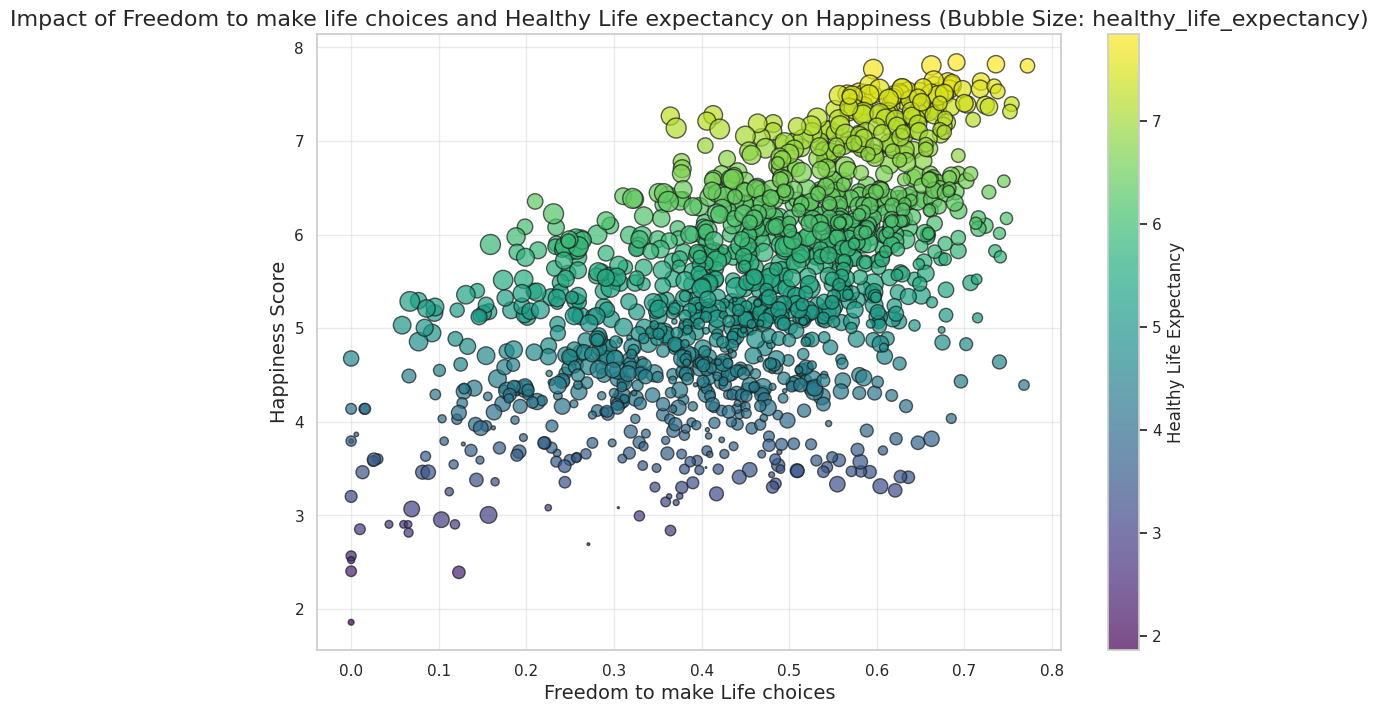

In [11]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    merged_df['freedom_to_make_life_choices'],
    merged_df['happiness_score'],
    s=merged_df['healthy_life_expectancy'] * 200,  # Bubble size represents healthy_life_expectancy
    c=merged_df['happiness_score'],  # Color represents happiness score
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Healthy Life Expectancy')

# Labels and title
plt.xlabel('Freedom to make Life choices', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.title('Impact of Freedom to make life choices and Healthy Life expectancy on Happiness (Bubble Size: healthy_life_expectancy)', fontsize=16)

# Add grid for better readability
plt.grid(alpha=0.4)
plt.show()


Mounted at /content/drive


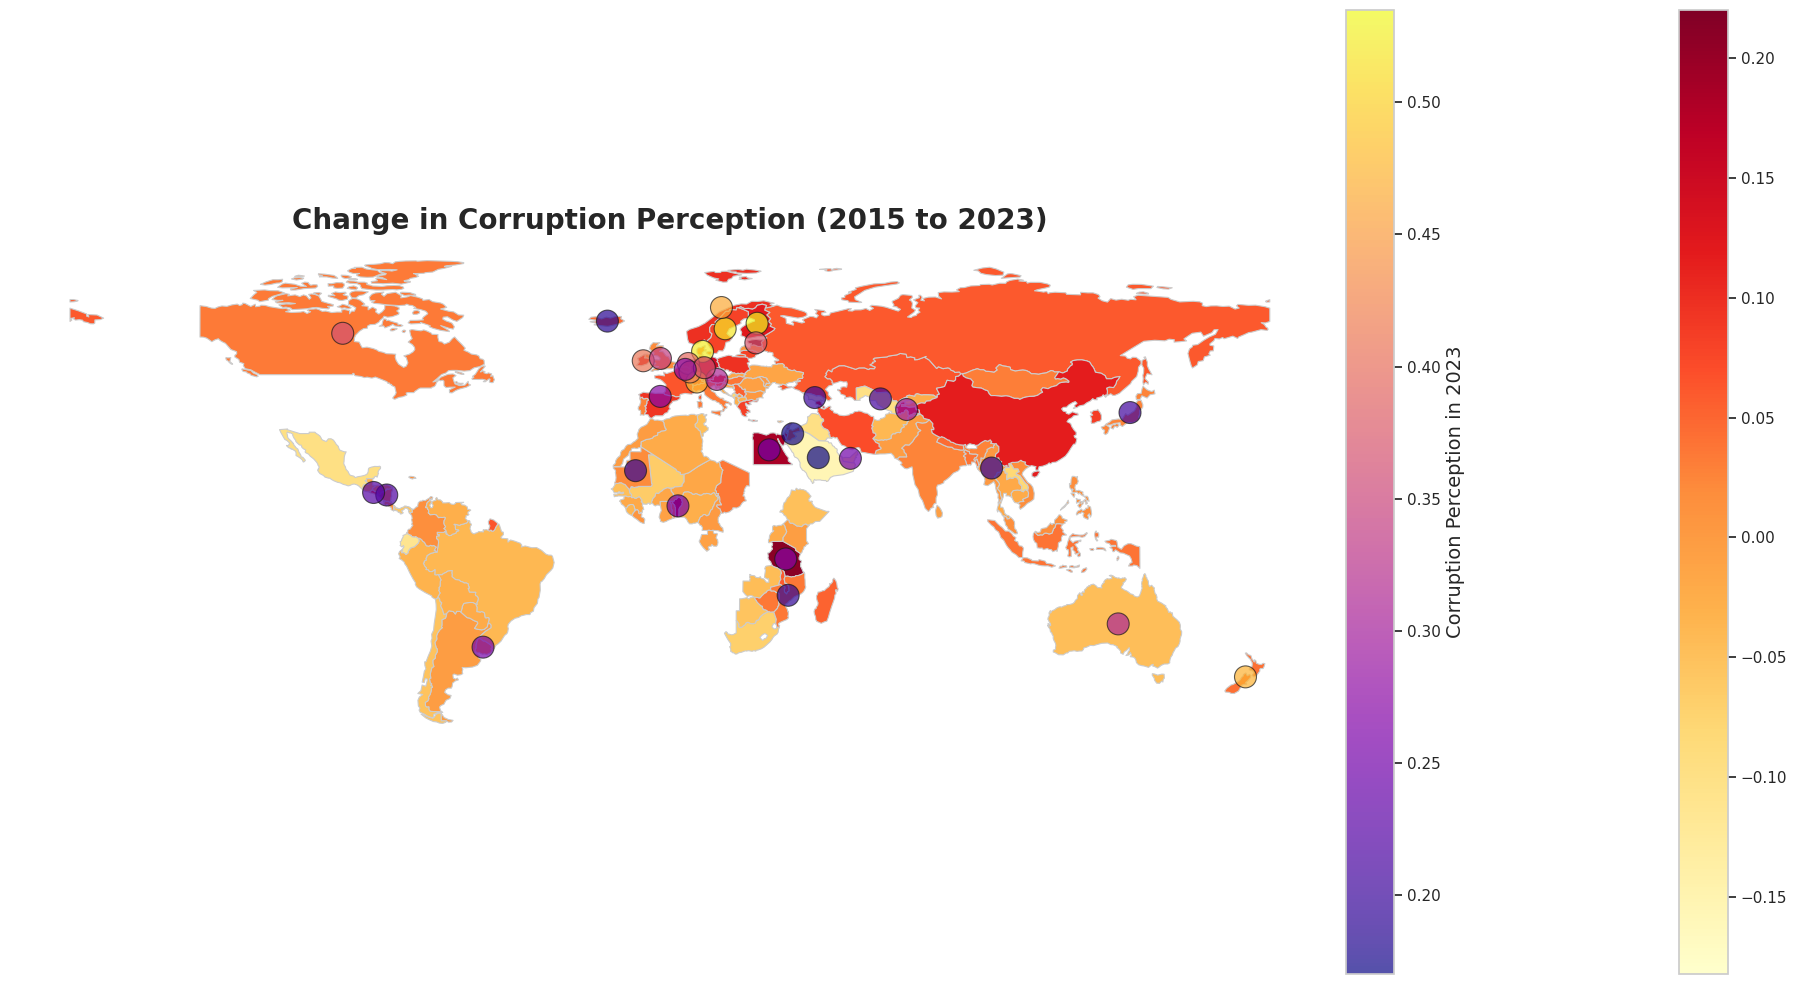

In [12]:


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

# Mount Google Drive to access files
drive.mount('/content/drive', force_remount=True)

# Step 1: Load the world shapefile data (Natural Earth countries shapefile)
shapefile_path = '/content/drive/MyDrive/IS Mid Term Report/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Step 2: Load your corruption data (adjust the path accordingly)
# merged_df = pd.read_csv('merged_happiness_data.csv')  # Uncomment and replace with the correct path

# Step 3: Filter the data for the years 2015 and 2023
df_2015 = merged_df[merged_df['year'] == 2015]
df_2023 = merged_df[merged_df['year'] == 2023]

# Step 4: Calculate the change in corruption from 2015 to 2023
corruption_2015 = df_2015[['country', 'perceptions_of_corruption']].rename(columns={'perceptions_of_corruption': 'corruption_2015'})
corruption_2023 = df_2023[['country', 'perceptions_of_corruption']].rename(columns={'perceptions_of_corruption': 'corruption_2023'})

# Merge the data to calculate the change in corruption
corruption_change = pd.merge(corruption_2015, corruption_2023, on='country')
corruption_change['corruption_change'] = corruption_change['corruption_2023'] - corruption_change['corruption_2015']

# Step 5: Merge corruption change data with world data
world = world.rename(columns={'NAME': 'country'})  # Rename for consistency
world_data = pd.merge(world, corruption_change[['country', 'corruption_change']], on='country', how='left')

# Step 6: Create the choropleth map for corruption change from 2015 to 2023 with a distinct color map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))  # Adjust figure size for better visibility

# Plot the world map with the corruption change data using a visually appealing 'YlOrRd' color map
world_data.plot(column='corruption_change', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add colorbar for the corruption change background map
ax.set_title('Change in Corruption Perception (2015 to 2023)', fontsize=20, fontweight='bold')
ax.set_axis_off()  # Hide axes for a cleaner map

# Step 7: Overlay the radiating points for high corruption in 2023
# Filter out countries with high corruption in 2023
high_corruption_threshold = merged_df['perceptions_of_corruption'].quantile(0.75)
high_corruption_df = merged_df[merged_df['perceptions_of_corruption'] >= high_corruption_threshold]
high_corruption_df_2023 = high_corruption_df[high_corruption_df['year'] == 2023]

# Merge with world data to get centroids
world['centroid'] = world.geometry.centroid  # Calculate country centroids
centroid_df = world[['country', 'centroid']]  # Create a DataFrame with centroids
corruption_with_coords = pd.merge(high_corruption_df_2023, centroid_df, on='country', how='inner')

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(corruption_with_coords, geometry=corruption_with_coords['centroid'])

# Spread the points in a radiating manner by adding a random radial offset
spread_factor = 0.1  # Controls the spread of points (adjust this value for more/less spread)
random_angles = np.random.uniform(0, 2 * np.pi, len(gdf))  # Generate random angles for each point
random_distances = np.random.uniform(0, spread_factor, len(gdf))  # Generate random distances for each point
x_offsets = np.cos(random_angles) * random_distances
y_offsets = np.sin(random_angles) * random_distances

# Apply the offsets to the centroid coordinates
gdf['x_spread'] = gdf.geometry.x + x_offsets
gdf['y_spread'] = gdf.geometry.y + y_offsets

# Plot the radiating points on top of the map using a distinct color map like 'plasma' for better contrast
scatter = ax.scatter(
    gdf['x_spread'], gdf['y_spread'],
    c=gdf['perceptions_of_corruption'],  # Color by corruption rate
    cmap='plasma',  # Using 'plasma' for a visually appealing color map
    s=250, alpha=0.7, edgecolor='k', marker='o', linewidth=0.8
)

# Add a colorbar for the corruption points
cbar = fig.colorbar(scatter, ax=ax, orientation="vertical", pad=0.01)
cbar.set_label('Corruption Perception in 2023', fontsize=14)

# Show the final map with choropleth and radiating points
plt.tight_layout()
plt.show()










Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


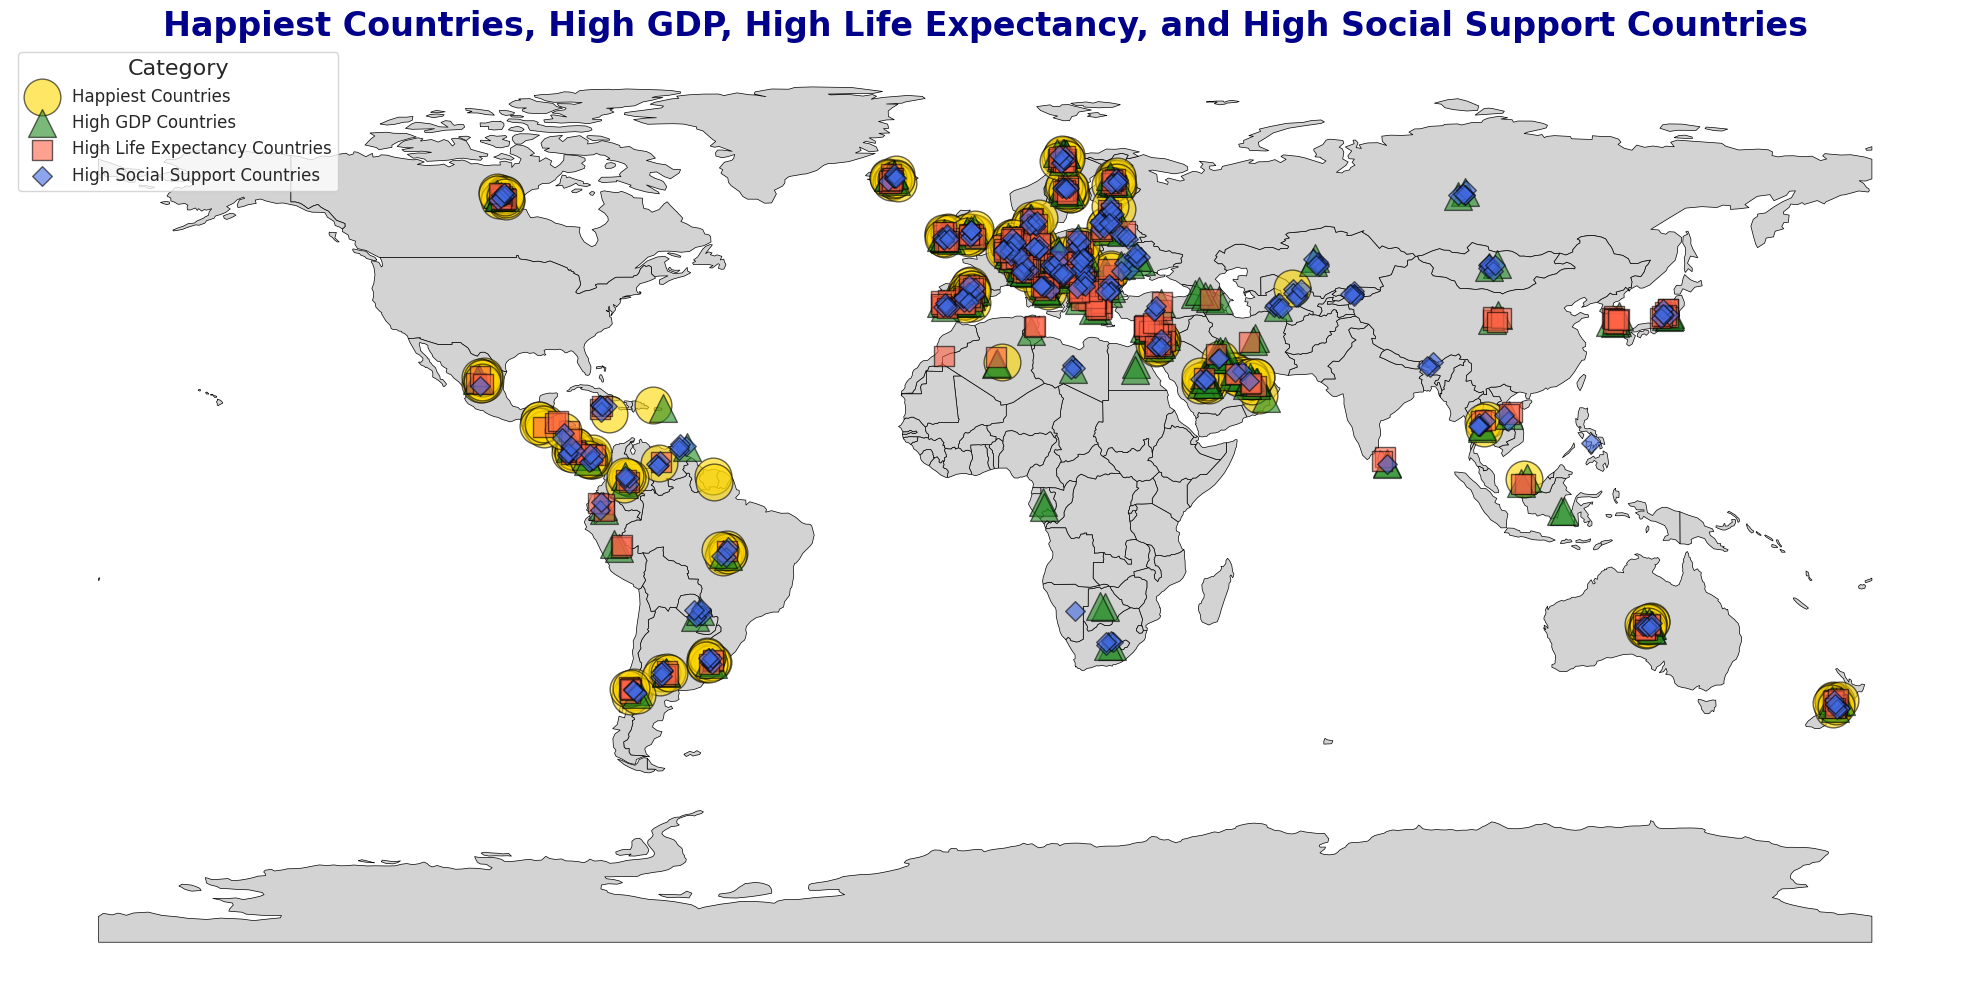

In [13]:



import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Step 1: Load the world shapefile data (Natural Earth countries shapefile)
shapefile_path = '/content/drive/MyDrive/IS Mid Term Report/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Step 2: Load your happiness, GDP, life expectancy, and social support data (Replace 'merged_df' with your actual DataFrame)
# merged_df = pd.read_csv('merged_happiness_data.csv')  # Uncomment and replace with the correct path

# Step 3: Define thresholds for happiness score, GDP, life expectancy, and social support
happiness_threshold = merged_df['happiness_score'].quantile(0.75)  # Top 25% happiest countries
gdp_threshold = merged_df['gdp_per_capita'].quantile(0.75)  # Top 25% GDP countries
life_expectancy_threshold = merged_df['healthy_life_expectancy'].quantile(0.75)  # Top 25% life expectancy countries
social_support_threshold = merged_df['social_support'].quantile(0.75)  # Top 25% social support countries

# Step 4: Filter the data for happiest countries, high GDP countries, high life expectancy countries, and high social support countries
happiest_countries = merged_df[merged_df['happiness_score'] > happiness_threshold]
high_gdp_countries = merged_df[merged_df['gdp_per_capita'] > gdp_threshold]
high_life_expectancy_countries = merged_df[merged_df['healthy_life_expectancy'] > life_expectancy_threshold]
high_social_support_countries = merged_df[merged_df['social_support'] > social_support_threshold]

# Step 5: Merge world map with happiest countries, high GDP countries, high life expectancy countries, and high social support countries to get their centroids
world['centroid'] = world.geometry.centroid  # Calculate country centroids
centroid_df = world[['NAME', 'centroid']]  # Change 'NAME' if needed based on column names

# Merge with happiest countries
happiest_with_coords = pd.merge(happiest_countries, centroid_df, left_on='country', right_on='NAME', how='inner')

# Merge with high GDP countries
high_gdp_with_coords = pd.merge(high_gdp_countries, centroid_df, left_on='country', right_on='NAME', how='inner')

# Merge with high life expectancy countries
high_life_expectancy_with_coords = pd.merge(high_life_expectancy_countries, centroid_df, left_on='country', right_on='NAME', how='inner')

# Merge with high social support countries
high_social_support_with_coords = pd.merge(high_social_support_countries, centroid_df, left_on='country', right_on='NAME', how='inner')

# Extract x and y coordinates from the centroid geometries for all categories
happiest_with_coords['centroid_x'] = happiest_with_coords['centroid'].apply(lambda geom: geom.x)
happiest_with_coords['centroid_y'] = happiest_with_coords['centroid'].apply(lambda geom: geom.y)

high_gdp_with_coords['centroid_x'] = high_gdp_with_coords['centroid'].apply(lambda geom: geom.x)
high_gdp_with_coords['centroid_y'] = high_gdp_with_coords['centroid'].apply(lambda geom: geom.y)

high_life_expectancy_with_coords['centroid_x'] = high_life_expectancy_with_coords['centroid'].apply(lambda geom: geom.x)
high_life_expectancy_with_coords['centroid_y'] = high_life_expectancy_with_coords['centroid'].apply(lambda geom: geom.y)

high_social_support_with_coords['centroid_x'] = high_social_support_with_coords['centroid'].apply(lambda geom: geom.x)
high_social_support_with_coords['centroid_y'] = high_social_support_with_coords['centroid'].apply(lambda geom: geom.y)

# Step 6: Add jitter to prevent overlap
def jitter_coordinates(df, jitter_strength=1.0):
    df['centroid_x_jittered'] = df['centroid_x'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))
    df['centroid_y_jittered'] = df['centroid_y'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))
    return df

happiest_with_coords = jitter_coordinates(happiest_with_coords)
high_gdp_with_coords = jitter_coordinates(high_gdp_with_coords)
high_life_expectancy_with_coords = jitter_coordinates(high_life_expectancy_with_coords)
high_social_support_with_coords = jitter_coordinates(high_social_support_with_coords)

# Step 7: Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))  # Adjusted figsize for better visibility

# Plot the world map with a lighter background
world.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)

# Step 8: Plot the happiest countries, high GDP countries, high life expectancy countries, and high social support countries
# Use more appealing colors and larger, more transparent markers
ax.scatter(happiest_with_coords['centroid_x_jittered'], happiest_with_coords['centroid_y_jittered'],
           c='gold', s=700, alpha=0.6, edgecolor='black', marker='o', label='Happiest Countries')  # Larger size, soft transparency

ax.scatter(high_gdp_with_coords['centroid_x_jittered'], high_gdp_with_coords['centroid_y_jittered'],
           c='forestgreen', s=400, alpha=0.6, edgecolor='black', marker='^', label='High GDP Countries')  # Moderate size, soft transparency

ax.scatter(high_life_expectancy_with_coords['centroid_x_jittered'], high_life_expectancy_with_coords['centroid_y_jittered'],
           c='tomato', s=200, alpha=0.6, edgecolor='black', marker='s', label='High Life Expectancy Countries')  # Moderate size, soft transparency

ax.scatter(high_social_support_with_coords['centroid_x_jittered'], high_social_support_with_coords['centroid_y_jittered'],
           c='royalblue', s=100, alpha=0.6, edgecolor='black', marker='D', label='High Social Support Countries')  # Smaller size, soft transparency


# Step 9: Add legend and title
ax.legend(title='Category', title_fontsize=16, fontsize=12, loc='upper left')
ax.set_title('Happiest Countries, High GDP, High Life Expectancy, and High Social Support Countries', fontsize=24, fontweight='bold', color='darkblue')
ax.set_axis_off()  # Hide axes for a cleaner map

# Step 10: Show the plot
plt.tight_layout()
plt.show()



<ipython-input-14-f730360ab0c5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='perceptions_of_corruption', data=merged_df, palette="coolwarm")


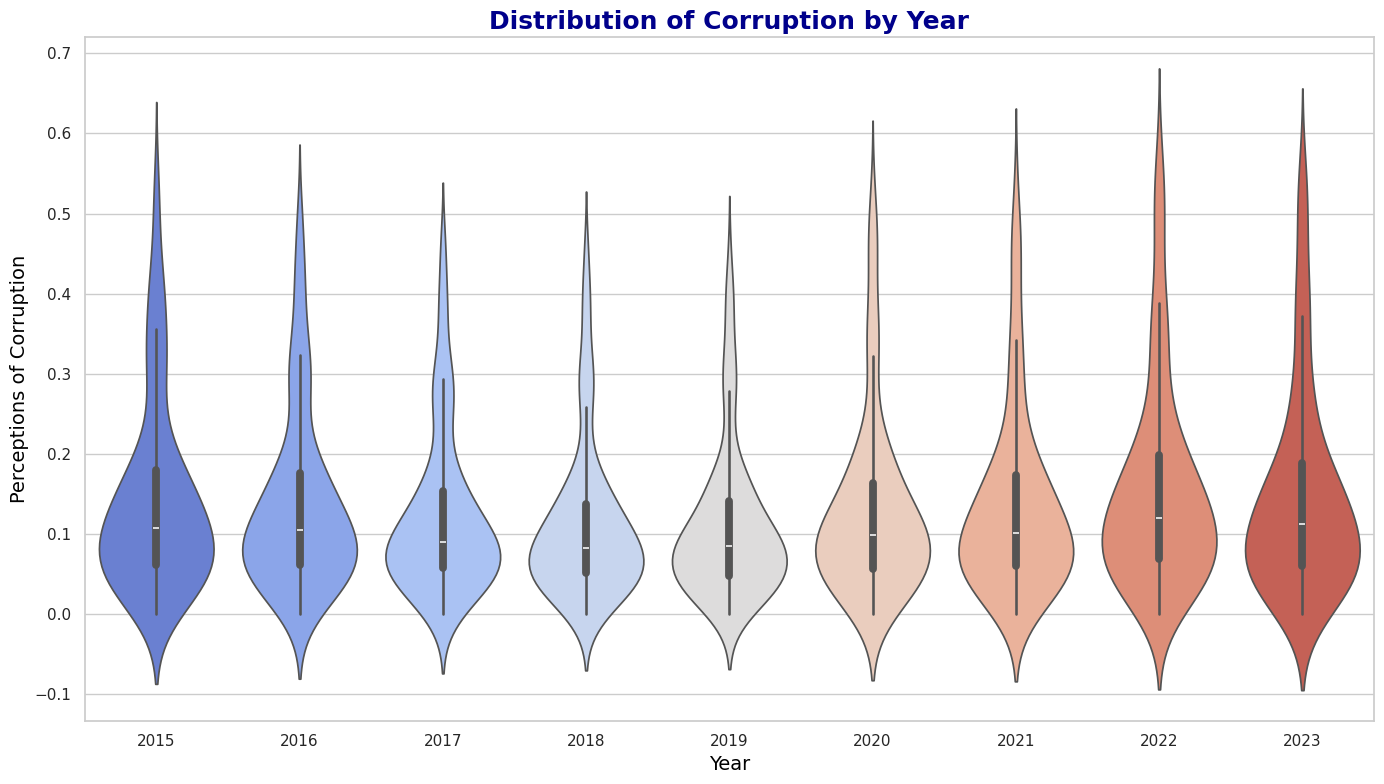

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more visually appealing color palette
plt.figure(figsize=(14, 8))
sns.violinplot(x='year', y='perceptions_of_corruption', data=merged_df, palette="coolwarm")

# Add a title with better styling
plt.title('Distribution of Corruption by Year', fontsize=18, fontweight='bold', color='darkblue')

# Customize the labels with more elegant font sizes
plt.xlabel('Year', fontsize=14, fontweight='medium', color='black')
plt.ylabel('Perceptions of Corruption', fontsize=14, fontweight='medium', color='black')

# Tight layout to make the plot more compact and ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


In [15]:
import plotly.express as px

# Plotting a choropleth map
fig = px.choropleth(
    df,
    locations='country',  # Column with country names
    locationmode='country names',
    color='happiness_score',  # Color based on happiness score
    hover_name='country',  # Information shown on hover
    title='World Happiness Map',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show()


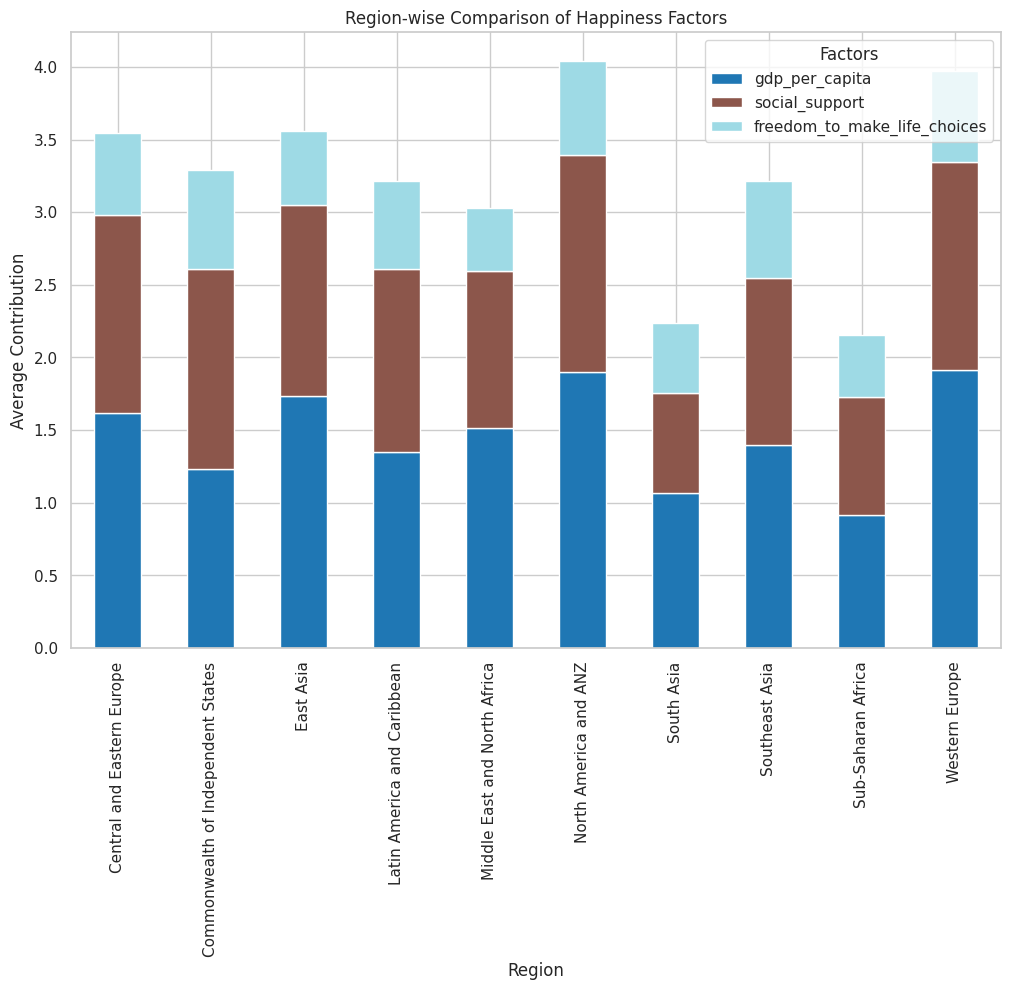

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Group by region and calculate mean contributions
region_data = df.groupby('region')[['gdp_per_capita', 'social_support', 'freedom_to_make_life_choices']].mean()

# Plot stacked bar chart
region_data.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Region-wise Comparison of Happiness Factors')
plt.ylabel('Average Contribution')
plt.xlabel('Region')
plt.legend(title='Factors')
plt.show()


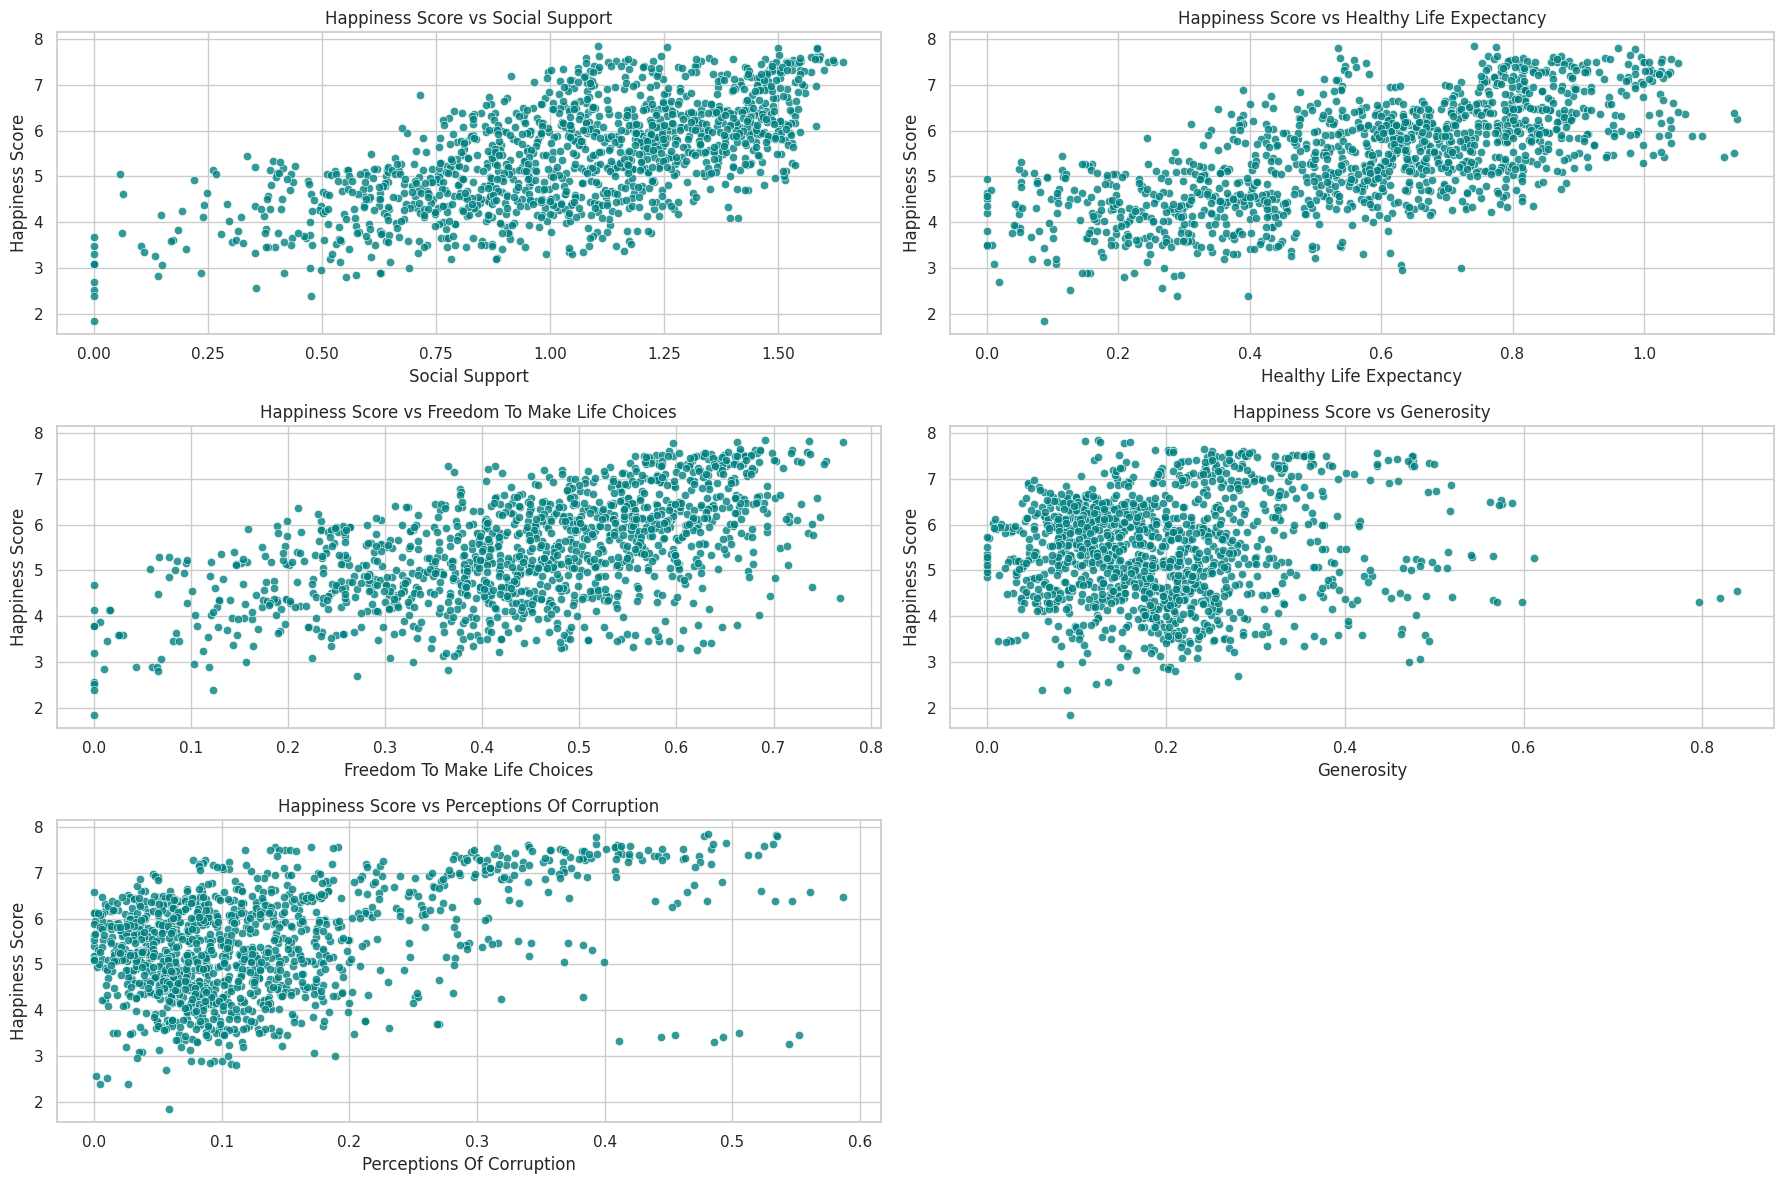

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot against happiness_score
variables_to_plot = ['social_support', 'healthy_life_expectancy',
                     'freedom_to_make_life_choices', 'generosity',
                     'perceptions_of_corruption']

# Create scatter plots for happiness_score vs. each variable
plt.figure(figsize=(18, 12))

for idx, var in enumerate(variables_to_plot, start=1):
    plt.subplot(3, 2, idx)
    sns.scatterplot(data=merged_df, x=var, y='happiness_score', alpha=0.8, color='teal')
    plt.title(f'Happiness Score vs {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Happiness Score')
    plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-18-48be28d95777>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




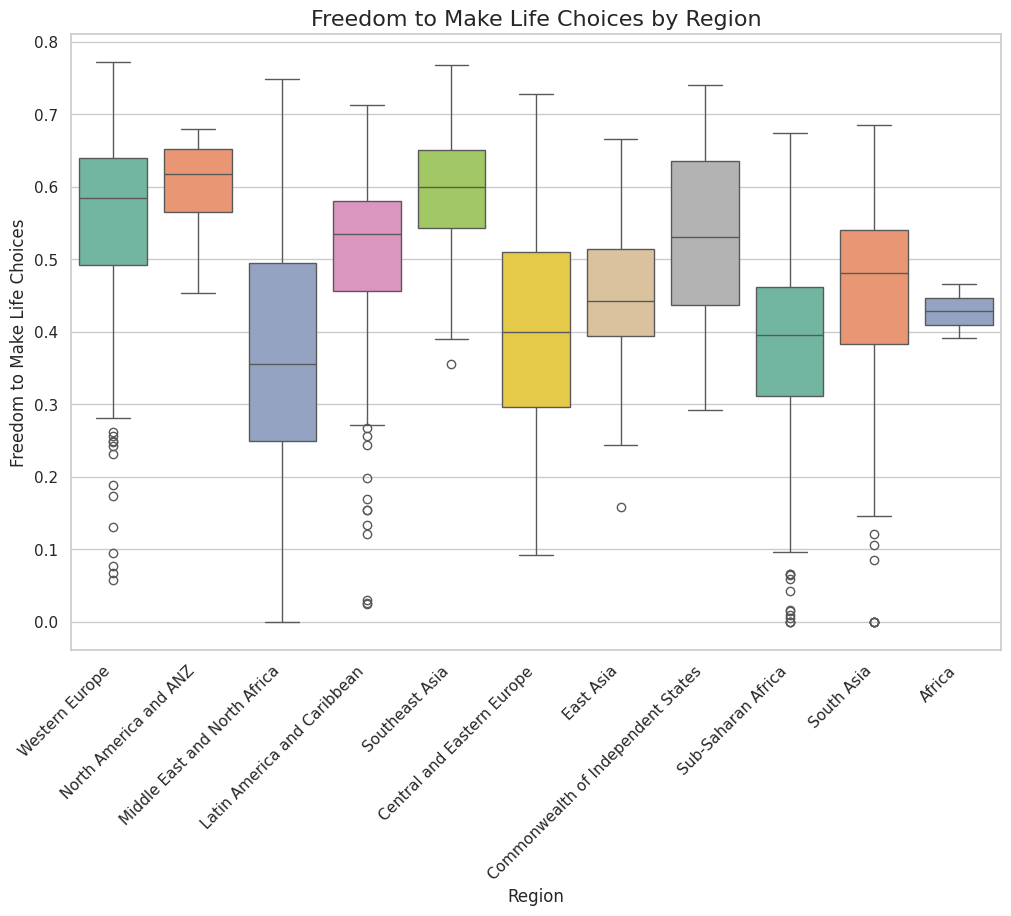

In [18]:
# Boxplot of Freedom to Make Life Choices by Region
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df, x='region', y='freedom_to_make_life_choices', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Freedom to Make Life Choices by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Freedom to Make Life Choices')
plt.show()


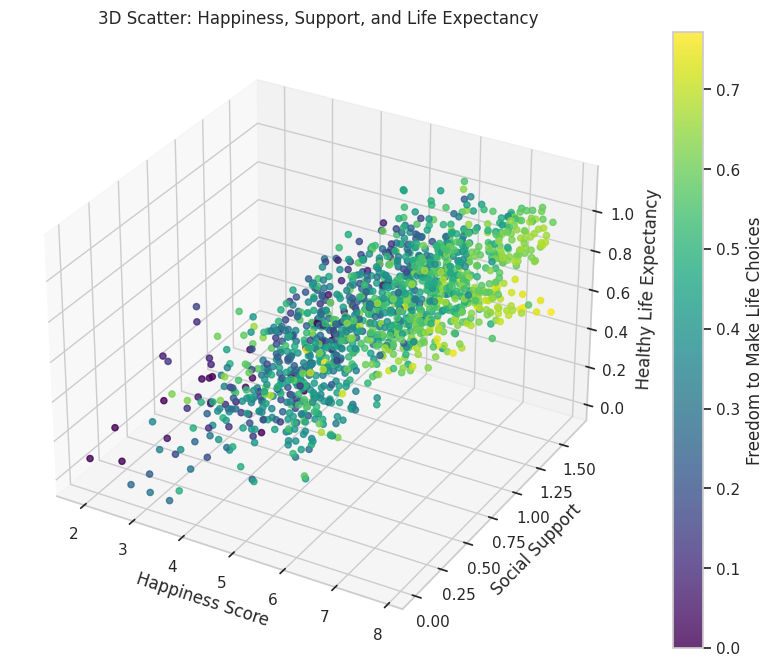

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter: Happiness Score, Social Support, and Healthy Life Expectancy
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(merged_df['happiness_score'], merged_df['social_support'],
                     merged_df['healthy_life_expectancy'],
                     c=merged_df['freedom_to_make_life_choices'], cmap='viridis', alpha=0.8)
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Social Support')
ax.set_zlabel('Healthy Life Expectancy')
plt.colorbar(scatter, ax=ax, label='Freedom to Make Life Choices')
plt.title('3D Scatter: Happiness, Support, and Life Expectancy')
plt.show()


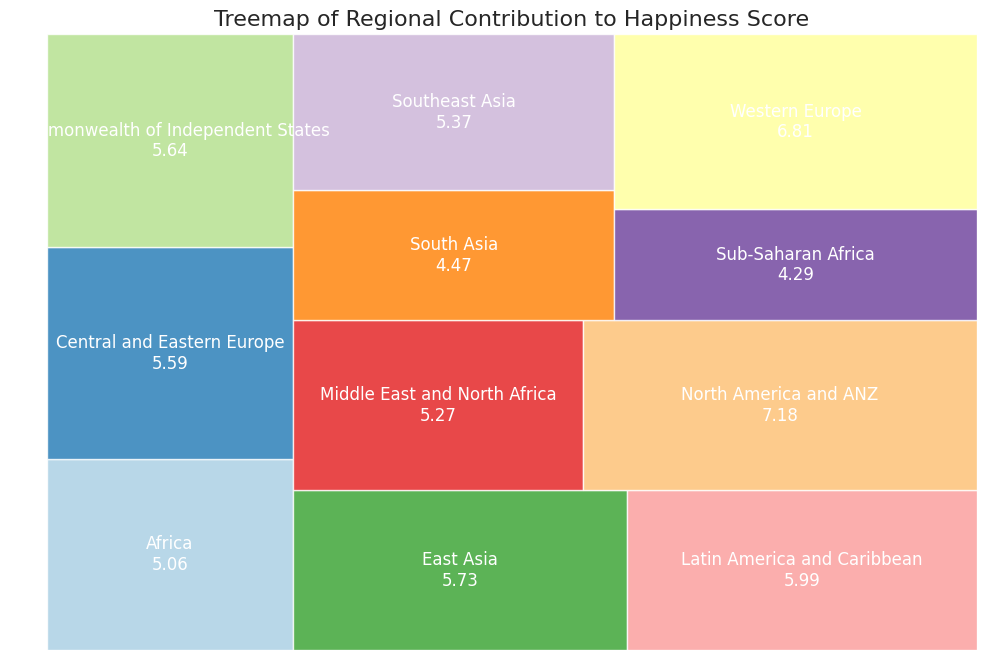

In [21]:
!pip install squarify

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating average happiness scores by region
region_happiness = merged_df.groupby('region')['happiness_score'].mean()

# Treemap
plt.figure(figsize=(12, 8))

# Define the colors for the regions
colors = sns.color_palette("Paired", len(region_happiness))

# Plot the treemap
squarify.plot(sizes=region_happiness.values, color=colors, alpha=0.8)

# Add labels manually
for i, rect in enumerate(plt.gca().patches):
    # Getting the center of each rectangle (for labeling)
    x, y, width, height = rect.get_bbox().bounds
    label = f"{region_happiness.index[i]}\n{region_happiness.values[i]:.2f}"
    plt.text(x + width/2, y + height/2, label, ha="center", va="center", fontsize=12, color="white")

# Add title and remove axis
plt.title("Treemap of Regional Contribution to Happiness Score", fontsize=16)
plt.axis('off')

# Show the plot
plt.show()


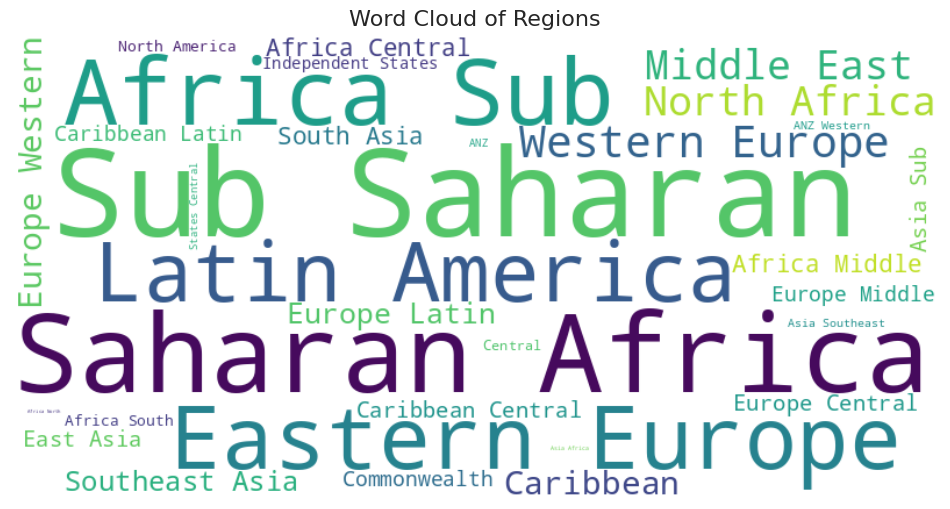

In [22]:
from wordcloud import WordCloud

# Word cloud for regions
region_text = ' '.join(merged_df['region'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(region_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Regions', fontsize=16)
plt.show()


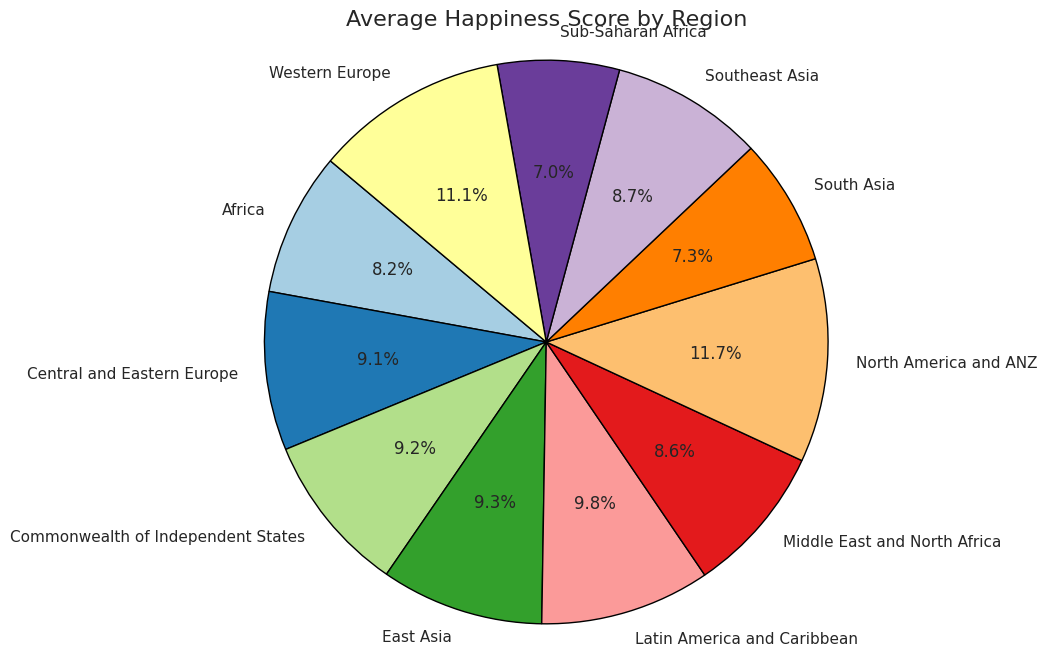

In [23]:
import matplotlib.pyplot as plt

# Aggregating average happiness scores by region
region_happiness = merged_df.groupby('region')['happiness_score'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_happiness, labels=region_happiness.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title('Average Happiness Score by Region', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


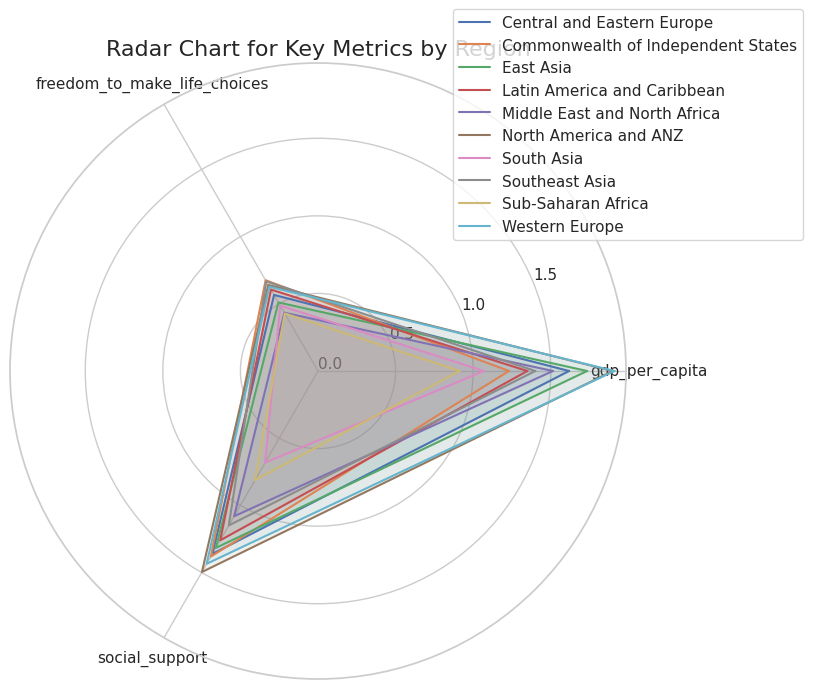

In [25]:
import numpy as np
from math import pi

# Aggregate data by region
radar_df = df.groupby('region')[['gdp_per_capita', 'freedom_to_make_life_choices', 'social_support']].mean()

# Radar chart
categories = radar_df.columns
num_vars = len(categories)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for region, row in radar_df.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=region)
    ax.fill(angles, values, alpha=0.1)

ax.set_yticks(np.arange(0, 2.0, 0.5))
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title("Radar Chart for Key Metrics by Region", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


In [30]:
#This chart provides a hierarchical breakdown of regions and their respective countries based on happiness scores.

fig.update_geos(projection_type="natural earth")
#fig.show()


fig = px.sunburst(
    df,
    path=['region', 'country'],  # Hierarchical breakdown: Region -> Country
    values='happiness_score',
    title='Happiness Score Breakdown by Region and Country',
    color='happiness_score',
    color_continuous_scale='RdYlGn'
)

fig.show()


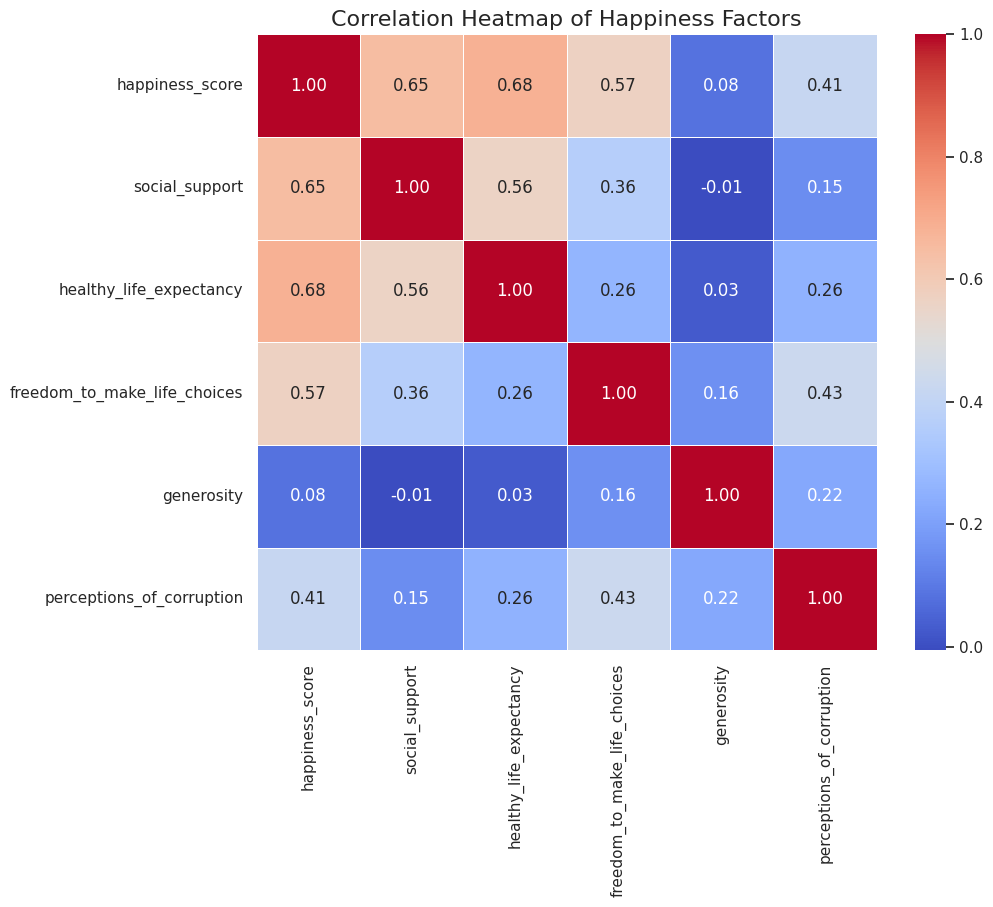

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = merged_df[['happiness_score', 'social_support', 'healthy_life_expectancy',
                  'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Happiness Factors', fontsize=16)
plt.show()


<ipython-input-40-ac2a145e6f8d>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




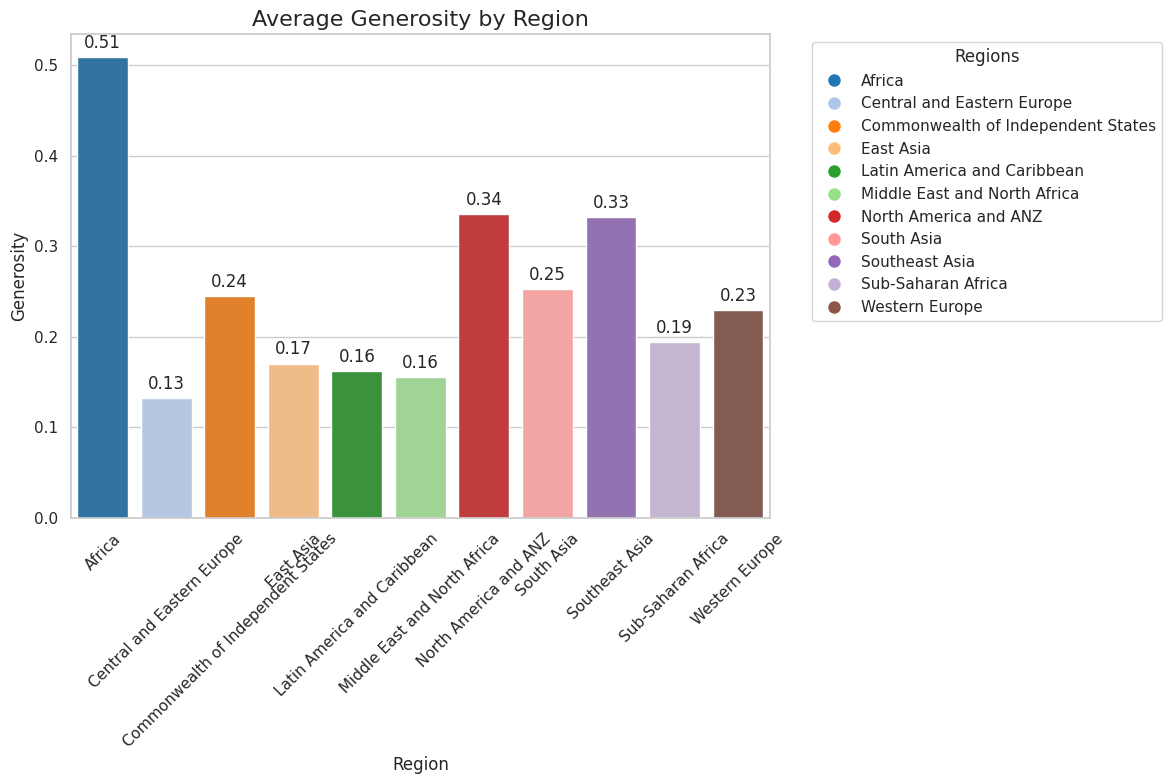

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Aggregating average generosity by region
region_generosity = merged_df.groupby('region')['generosity'].mean().reset_index()

# Define a more distinguishable color palette (tab20)
palette = sns.color_palette('tab20', len(region_generosity))

# Plot bar plot for generosity
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='region', y='generosity', data=region_generosity, palette=palette)

# Title and labels
plt.title('Average Generosity by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Generosity', fontsize=12)

# Adding labels to the bars
for index, value in enumerate(region_generosity['generosity']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', fontsize=12)

# Create a custom legend for the colors
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in palette]
region_labels = region_generosity['region'].tolist()

# Add the legend to the side
plt.legend(legend_labels, region_labels, title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [50]:
# Sorting the merged_df DataFrame by happiness_score in ascending order
sorted_df = merged_df.sort_values(by='happiness_score', ascending=False)

# Display the sorted DataFrame
res= sorted_df[['region', 'happiness_score']].head(30)
res


region  happiness_score
935   Western Europe           7.8420
1084  Western Europe           7.8210
782   Western Europe           7.8087
1230  Western Europe           7.8040
626   Western Europe           7.7690
783   Western Europe           7.6456
1085  Western Europe           7.6360
470   Western Europe           7.6320
936   Western Europe           7.6200
627   Western Europe           7.6000
471   Western Europe           7.5940
0     Western Europe           7.5870
1231  Western Europe           7.5860
937   Western Europe           7.5710
1     Western Europe           7.5610
784   Western Europe           7.5599
1086  Western Europe           7.5570
472   Western Europe           7.5550
938   Western Europe           7.5540
628   Western Europe           7.5540
315   Western Europe           7.5370
1232  Western Europe           7.5300
2     Western Europe           7.5270
158   Western Europe           7.5260
3     Western Europe           7.5220
316   Western Europe           7.5220
1087  Western Europe           7.5120
159   Western Europe           7.5090
785   Western Europe           7.5045
317   Western Europe           7.5040